# Generate the visitors dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys

In [3]:
# %pip install Faker

In [4]:
# tools for generating random data
import datetime
from faker import Faker
import random
from scipy.stats.distributions import bernoulli

faker = Faker()

In [5]:
Faker.seed(19)       # for IP addresses
random.seed(33)      # for A/B assignment
np.random.seed(55)   # for bought draw

In [6]:
N = 2000  # number of visitors total
rvA = bernoulli(p=0.06)  # A conversion (alternative)
rvB = bernoulli(p=0.04)  # B conversion (baseline)


visits_list = []

tstart = datetime.datetime.now()

for i in range(N):
    dt = datetime.timedelta(seconds=random.randint(1, 30))
    time = (tstart + dt).strftime('%d/%b/%Y:%H:%M:%S')
    version = random.choice(["A", "B"])
    ip = faker.ipv4()
    if version == "A":
        bought = rvA.rvs(1)[0]
    elif version == "B":
        bought = rvB.rvs(1)[0]
    visit = (ip, version, bought)
    visits_list.append(visit)

visitors = pd.DataFrame(visits_list, columns=["IP address", "version", "bought"])
visitors.head()

,IP address,version,bought
0,135.185.92.4,A,0
1,14.75.235.1,A,1
2,50.132.244.139,B,0
3,144.181.130.234,A,0
4,90.92.5.100,B,0


In [19]:
# visitors.to_csv("../datasets/visitors.csv", index=False)

In [8]:
visitors = pd.read_csv("../datasets/visitors.csv")
visitors.head()

,IP address,version,bought
0,135.185.92.4,A,0
1,14.75.235.1,A,1
2,50.132.244.139,B,0
3,144.181.130.234,A,0
4,90.92.5.100,B,0


In [9]:
visitors.groupby("version")["bought"].value_counts()

version  bought
A        0          880
         1           61
B        0         1019
         1           40
Name: bought, dtype: int64

In [10]:
visitors.groupby("version")["bought"].value_counts().unstack()

bought,0,1
version,,
A,880,61
B,1019,40


In [11]:
ct = pd.crosstab(index=visitors["version"],
                 columns=visitors["bought"],
                 margins=True, margins_name="TOTAL")
ct

bought,0,1,TOTAL
version,,,
A,880,61,941
B,1019,40,1059
TOTAL,1899,101,2000


In [12]:
# print(ct.style.to_latex())

In [13]:
pA = ct.loc["A",1] / ct.loc["A","TOTAL"]
pB = ct.loc["B",1] / ct.loc["B","TOTAL"]
pA, pB

(0.06482465462274177, 0.03777148253068933)

In [14]:
# print(ct.style.to_latex())

In [15]:
pA*(1-pA)

0.06062241877578401

Text(0.5, 0, 'proportion bought')

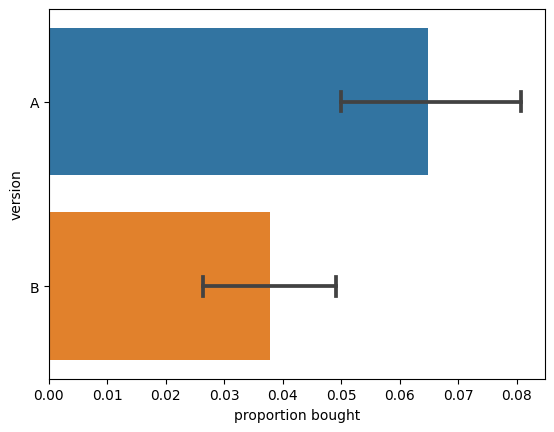

In [22]:
ax = sns.barplot(data=visitors, x="bought", y="version", capsize=0.1)
ax.set_xlabel("proportion bought")

In [24]:
# filename = "figures/compare_visitors.pdf"
# ax.figure.tight_layout()
# ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

# Full script

TODO: generate fake web server log using https://github.com/kiritbasu/Fake-Apache-Log-Generator/blob/master/apache-fake-log-gen.py

In [18]:
faker.user_agent()

'Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_9_8 rv:4.0; pl-PL) AppleWebKit/535.3.7 (KHTML, like Gecko) Version/4.0 Safari/535.3.7'